In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [4]:
# Set random seed for reproducible results
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
def create_simple_data(n_samples=1000):
    """
    Create simple 2D data that's easy to understand
    Think of this as coordinates of points forming patterns
    """
    # Create two groups of data points
    # Group 1: Points around (2, 2)
    group1_x = np.random.normal(2, 0.5, n_samples//2)
    group1_y = np.random.normal(2, 0.5, n_samples//2)

    # Group 2: Points around (-2, -2)
    group2_x = np.random.normal(-2, 0.5, n_samples//2)
    group2_y = np.random.normal(-2, 0.5, n_samples//2)

    # Combine both groups
    x_data = np.concatenate([group1_x, group2_x])
    y_data = np.concatenate([group1_y, group2_y])

    # Stack into 2D array: each row is one data point [x, y]
    data = np.column_stack([x_data, y_data])

    return data

# Create our simple dataset
original_data = create_simple_data(1000)
print(f"Original data shape: {original_data.shape}")
print(f"Each data point has {original_data.shape[1]} dimensions (x, y coordinates)")

Original data shape: (1000, 2)
Each data point has 2 dimensions (x, y coordinates)


#### build simple autoencoder

In [6]:
def build_simple_autoencoder(input_dim=2, encoding_dim=1):

    # INPUT LAYER
    input_layer = keras.Input(shape=(input_dim,))

    # ENCODER PART
    encoded = layers.Dense(encoding_dim, activation='relu', name='encoder')(input_layer)

    # DECODER PART
    decoded = layers.Dense(input_dim, activation='linear', name='decoder')(encoded)

    # Create the complete autoencoder model
    autoencoder = keras.Model(input_layer, decoded, name='simple_autoencoder')

    # Also create separate encoder and decoder models for analysis
    encoder = keras.Model(input_layer, encoded, name='encoder_only')

    # For decoder: create input that matches encoded dimension
    encoded_input = keras.Input(shape=(encoding_dim,))
    decoder_layer = autoencoder.layers[-1]  # Get the decoder layer
    decoder = keras.Model(encoded_input, decoder_layer(encoded_input), name='decoder_only')

    return autoencoder, encoder, decoder

# Build our autoencoder
autoencoder, encoder, decoder = build_simple_autoencoder(input_dim=2, encoding_dim=1)

print("\n=== AUTOENCODER ARCHITECTURE ===")
print("Complete Autoencoder:")
autoencoder.summary()


=== AUTOENCODER ARCHITECTURE ===
Complete Autoencoder:


Model: "simple_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Dense)                 │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Dense)                 │ (None, 2)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
print("\n=== TRAINING THE AUTOENCODER ===")

# Compile the model
autoencoder.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# Train the autoencoder
history = autoencoder.fit(
    original_data,
    original_data,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

print("Training completed!")


=== TRAINING THE AUTOENCODER ===
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 3.9844 - mae: 1.7302 - val_loss: 4.1169 - val_mae: 1.9672
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8120 - mae: 1.7128 - val_loss: 4.1217 - val_mae: 1.9678
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6685 - mae: 1.6969 - val_loss: 4.1278 - val_mae: 1.9685
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5489 - mae: 1.6808 - val_loss: 4.1347 - val_mae: 1.9692
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4462 - mae: 1.6627 - val_loss: 4.1415 - val_mae: 1.9698
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3538 - mae: 1.6414 - val_loss: 4.1472 - val_mae: 1.9699
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2665 - mae: 1.6160 - val_loss: 4.1509 - val_mae: 1.9694
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1812 - mae: 1.5865 - val_loss: 4.1514 - val_mae: 1.9678
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━

In [9]:
print("\n=== TESTING RECONSTRUCTION QUALITY ===")

# Test on some sample data
test_data = original_data[:10]  # First 10 samples
reconstructed_data = autoencoder.predict(test_data, verbose=0)

print("Original vs Reconstructed (first 5 samples):")
for i in range(5):
    orig = test_data[i]
    recon = reconstructed_data[i]
    error = np.mean((orig - recon)**2)  # Mean squared error
    print(f"Sample {i+1}: Original=({orig[0]:.2f}, {orig[1]:.2f}), Reconstructed=({recon[0]:.2f}, {recon[1]:.2f}), Error={error:.4f}")


=== TESTING RECONSTRUCTION QUALITY ===
Original vs Reconstructed (first 5 samples):
Sample 1: Original=(2.25, 2.46), Reconstructed=(2.42, 2.20), Error=0.0492
Sample 2: Original=(1.93, 2.95), Reconstructed=(2.28, 2.10), Error=0.4236
Sample 3: Original=(2.32, 1.30), Reconstructed=(2.06, 1.96), Error=0.2480
Sample 4: Original=(2.76, 2.28), Reconstructed=(2.87, 2.51), Error=0.0334
Sample 5: Original=(1.88, 1.67), Reconstructed=(1.75, 1.74), Error=0.0107


In [10]:
print("\n=== ANALYZING THE COMPRESSED REPRESENTATION ===")

# Get the compressed (encoded) representation
encoded_data = encoder.predict(original_data, verbose=0)

print(f"Original data: {original_data.shape} (2D points)")
print(f"Encoded data: {encoded_data.shape} (1D compressed)")
print(f"Compression ratio: {original_data.shape[1] / encoded_data.shape[1]:.1f}x smaller")

# Show some examples of the encoding
print("\nHow 2D points get compressed to 1D:")
for i in range(5):
    orig_point = original_data[i]
    encoded_value = encoded_data[i, 0]  # Single number
    print(f"Point ({orig_point[0]:.2f}, {orig_point[1]:.2f}) → {encoded_value:.2f}")


=== ANALYZING THE COMPRESSED REPRESENTATION ===
Original data: (1000, 2) (2D points)
Encoded data: (1000, 1) (1D compressed)
Compression ratio: 2.0x smaller

How 2D points get compressed to 1D:
Point (2.25, 2.46) → 5.27
Point (1.93, 2.95) → 5.06
Point (2.32, 1.30) → 4.75
Point (2.76, 2.28) → 5.95
Point (1.88, 1.67) → 4.29


#### One practical application

In [11]:
print("\n=== DENOISING APPLICATION ===")

def add_noise(data, noise_level=0.5):
    """Add random noise to data"""
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

# Create noisy data
noisy_data = add_noise(original_data, noise_level=0.3)

print("Building denoising autoencoder...")

# Build a slightly larger autoencoder for denoising
denoising_autoencoder, _, _ = build_simple_autoencoder(input_dim=2, encoding_dim=2)

# Compile and train on noisy data
denoising_autoencoder.compile(optimizer='adam', loss='mse')

print("Training denoising autoencoder...")
denoising_autoencoder.fit(
    noisy_data,              # Input: noisy data
    original_data,           # Target: clean data
    epochs=30,
    batch_size=32,
    verbose=0                # Quiet training
)

# Test denoising
test_noisy = noisy_data[:5]
test_clean_original = original_data[:5]
denoised = denoising_autoencoder.predict(test_noisy, verbose=0)

print("\nDenoising Results (first 3 samples):")
for i in range(3):
    noisy = test_noisy[i]
    clean = test_clean_original[i]
    denoised_point = denoised[i]

    print(f"Sample {i+1}:")
    print(f"  Original:     ({clean[0]:.2f}, {clean[1]:.2f})")
    print(f"  Noisy:        ({noisy[0]:.2f}, {noisy[1]:.2f})")
    print(f"  Denoised:     ({denoised_point[0]:.2f}, {denoised_point[1]:.2f})")

    # Calculate improvements
    noise_error = np.mean((noisy - clean)**2)
    denoised_error = np.mean((denoised_point - clean)**2)
    improvement = ((noise_error - denoised_error) / noise_error) * 100
    print(f"  Improvement:  {improvement:.1f}% better")
    print()


=== DENOISING APPLICATION ===
Building denoising autoencoder...
Training denoising autoencoder...

Denoising Results (first 3 samples):
Sample 1:
  Original:     (2.25, 2.46)
  Noisy:        (2.05, 2.42)
  Denoised:     (2.21, 2.38)
  Improvement:  80.6% better

Sample 2:
  Original:     (1.93, 2.95)
  Noisy:        (1.69, 2.86)
  Denoised:     (2.70, 2.80)
  Improvement:  -848.9% better

Sample 3:
  Original:     (2.32, 1.30)
  Noisy:        (1.76, 1.36)
  Denoised:     (1.10, 1.44)
  Improvement:  -363.4% better



Visualization saved as 'autoencoder_results.png'


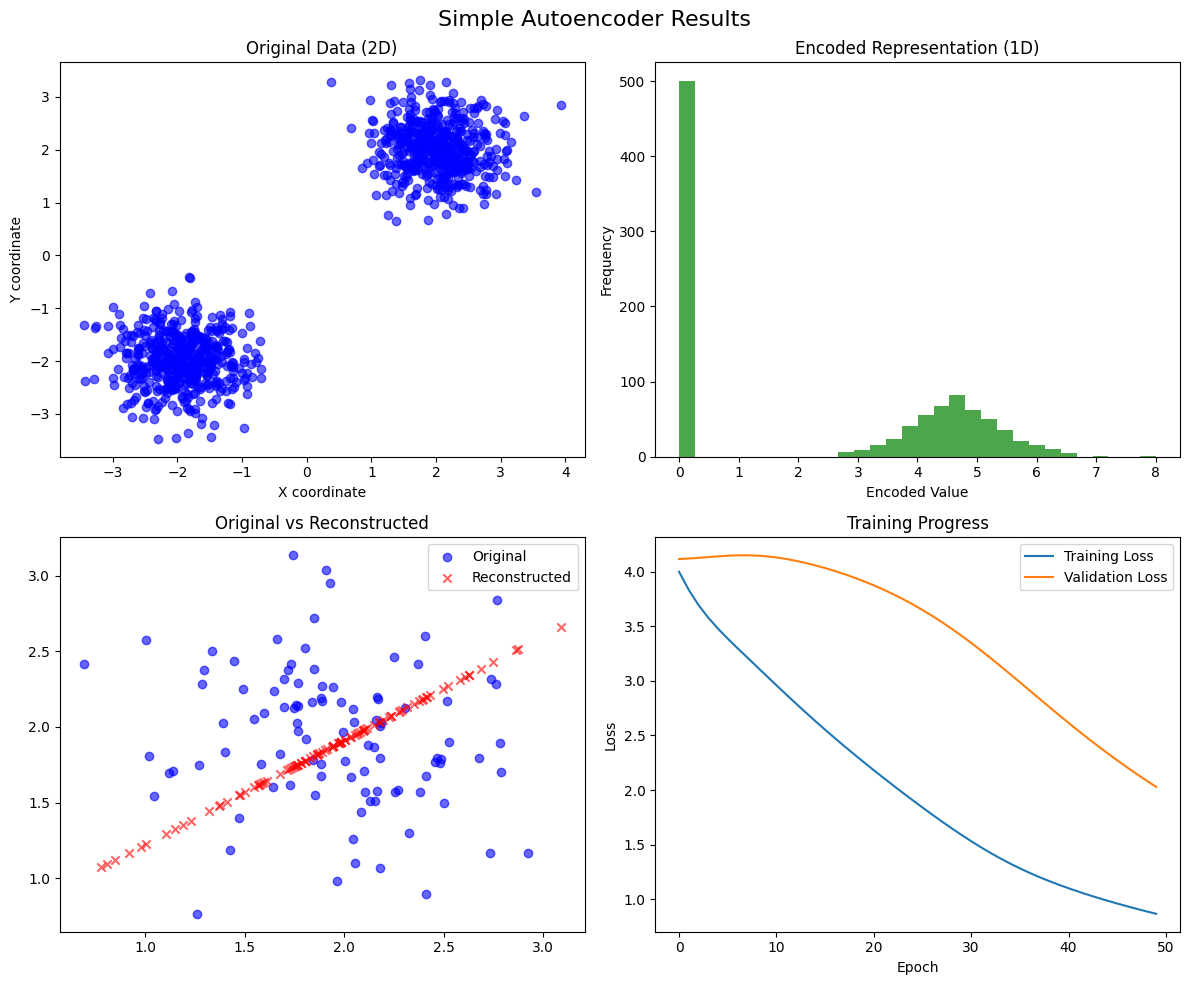

In [12]:
def create_simple_plot():
    """Create a simple visualization of results"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Simple Autoencoder Results', fontsize=16)

    # Plot 1: Original data
    axes[0,0].scatter(original_data[:, 0], original_data[:, 1], alpha=0.6, c='blue')
    axes[0,0].set_title('Original Data (2D)')
    axes[0,0].set_xlabel('X coordinate')
    axes[0,0].set_ylabel('Y coordinate')

    # Plot 2: Encoded representation (1D shown as histogram)
    axes[0,1].hist(encoded_data.flatten(), bins=30, alpha=0.7, color='green')
    axes[0,1].set_title('Encoded Representation (1D)')
    axes[0,1].set_xlabel('Encoded Value')
    axes[0,1].set_ylabel('Frequency')

    # Plot 3: Reconstruction comparison
    reconstructed = autoencoder.predict(original_data[:100], verbose=0)
    axes[1,0].scatter(original_data[:100, 0], original_data[:100, 1],
                      alpha=0.6, label='Original', c='blue')
    axes[1,0].scatter(reconstructed[:, 0], reconstructed[:, 1],
                      alpha=0.6, label='Reconstructed', c='red', marker='x')
    axes[1,0].set_title('Original vs Reconstructed')
    axes[1,0].legend()

    # Plot 4: Training loss
    axes[1,1].plot(history.history['loss'], label='Training Loss')
    axes[1,1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1,1].set_title('Training Progress')
    axes[1,1].set_xlabel('Epoch')
    axes[1,1].set_ylabel('Loss')
    axes[1,1].legend()

    plt.tight_layout()
    return fig

# Create and save the plot
try:
    fig = create_simple_plot()
    plt.savefig('autoencoder_results.png', dpi=150, bbox_inches='tight')
    print("Visualization saved as 'autoencoder_results.png'")
    plt.show()
except:
    print("Matplotlib not available for display, but code ran successfully!")